# Notebook de consultas de dados do Diário Oficial da União no ElasticSearch

In [1]:
import pandas as pd
import json
import elasticsearch
from elasticsearch import helpers
from elasticsearch import Elasticsearch

ES_URL = "localhost:9200"
NOME_INDICE = "informacao_dou"

In [2]:
try:

    # Declare um cliente Elasticsearch
    client = elasticsearch.Elasticsearch(ES_URL)

    elastic_info = Elasticsearch.info(client)
    print ("Informação do Cluster:", json.dumps(elastic_info, indent=4 ))

except Exception as err:
    print ("Erro clinte Elasticsearch", err)
    client = None

Informação do Cluster: {
    "name": "elastic_node01",
    "cluster_name": "docker-cluster",
    "cluster_uuid": "Bui7DUIOSd-FSP9v4pfrlw",
    "version": {
        "number": "7.9.2",
        "build_flavor": "default",
        "build_type": "docker",
        "build_hash": "d34da0ea4a966c4e49417f2da2f244e3e97b4e6e",
        "build_date": "2020-09-23T00:45:33.626720Z",
        "build_snapshot": false,
        "lucene_version": "8.6.2",
        "minimum_wire_compatibility_version": "6.8.0",
        "minimum_index_compatibility_version": "6.0.0-beta1"
    },
    "tagline": "You Know, for Search"
}


### Busca simples por query string

In [57]:
# Busca em todos os indices as 10 primeiras ocorrências
query = {
    "query": {
        "query_string": {
            "query": "denise tieko naruto"
        }
    }
}

In [73]:
def print_result (res):
    print(f"Encontrados {res['hits']['total']['value']} resultados")
    print(f"Tempo de consulta {res['took']} ms")
    print(f"Shards pesquisados {res['_shards']['total']}")
    print(res['hits']['hits'])

In [74]:
# Consulta pesquisando em todos os indices
results = client.search(index='', body=query, size = 10)
print_result(results)

Encontrados 199 resultados
Tempo de consulta 16 ms
Shards pesquisados 12
[{'_index': 'informacao_dou', '_type': '_doc', '_id': 'oLvXP3YBNt7aN5wThQpd', '_score': 11.241804, '_source': {'din_inclusao': '2018-06-15T11:02:46.747', 'dsc_objeto': 'Despacho SCG/ANEEL nº 1.296, de 12 de junho de 2018', 'texto': '<p>Levamos ao conhecimento o Despacho SCG/ANEEL n&ordm; 1.296, de 12 de junho de 2018, publicado&nbsp;dia 15 de junho de 2018,&nbsp;que resolve:</p><p>(i) alterar, a pedido da interessada, a Tabela 1 constante no Despacho n&ordm; 1.112, de 23 de maio de 20', 'flg_importanciaassunto': 'N', 'flg_incluirsintese': 1, 'nom_inclusao': 'DENISE TIEKO NARUTO', 'dsc_tpobjeto': 'DESPACHO'}}, {'_index': 'informacao_dou', '_type': '_doc', '_id': 'o7vXP3YBNt7aN5wThQp5', '_score': 11.241804, '_source': {'din_inclusao': '2018-06-15T11:15:38.567', 'dsc_objeto': 'Despacho SCG/ANEEL nº 1.299, de 12 de junho de 2018', 'texto': '<p>Levamos ao conhecimento o Despacho SCG/ANEEL n&ordm; 1.299, de 12 de junho 

In [75]:
# Consulta pesquisando no indice informacao dou
results = client.search(index=NOME_INDICE, body=query, size = 10)
print_result(results)

Encontrados 196 resultados
Tempo de consulta 4 ms
Shards pesquisados 3
[{'_index': 'informacao_dou', '_type': '_doc', '_id': 'oLvXP3YBNt7aN5wThQpd', '_score': 11.241804, '_source': {'din_inclusao': '2018-06-15T11:02:46.747', 'dsc_objeto': 'Despacho SCG/ANEEL nº 1.296, de 12 de junho de 2018', 'texto': '<p>Levamos ao conhecimento o Despacho SCG/ANEEL n&ordm; 1.296, de 12 de junho de 2018, publicado&nbsp;dia 15 de junho de 2018,&nbsp;que resolve:</p><p>(i) alterar, a pedido da interessada, a Tabela 1 constante no Despacho n&ordm; 1.112, de 23 de maio de 20', 'flg_importanciaassunto': 'N', 'flg_incluirsintese': 1, 'nom_inclusao': 'DENISE TIEKO NARUTO', 'dsc_tpobjeto': 'DESPACHO'}}, {'_index': 'informacao_dou', '_type': '_doc', '_id': 'o7vXP3YBNt7aN5wThQp5', '_score': 11.241804, '_source': {'din_inclusao': '2018-06-15T11:15:38.567', 'dsc_objeto': 'Despacho SCG/ANEEL nº 1.299, de 12 de junho de 2018', 'texto': '<p>Levamos ao conhecimento o Despacho SCG/ANEEL n&ordm; 1.299, de 12 de junho de

É notável a melhora do tempo de resposta quando se pesquisa o indice diretamente. Houve diferença de quantidade, mesmo com indices que não tem correlação (20newsgroup_teste_insercao).Vamos verificar.

In [76]:
# Teste da mesma consulta no outro indice
results = client.search(index='20newsgroup_teste_insercao', body=query, size = 3)
print_result(results)

ons list.  If your server doesn\'t have this,\n\tyou may want to investigate compiling X11R5, patchlevel 18 or later,\n\tor bugging your vendor.\n\n\tkt is a simpler program, which should work with unextended X servers.\n\tAnother program called xsendevent also exists, but I haven\'t seen it.\n\n\tBoth a2x and kt are available via anonymous ftp from soda.berkeley.edu.\n\n    2. X terminals\n\n\tAlso, a number of X terminals (NCD, Tektronics, to name a few) use\n\tPC-compatible keyboards.  If you have an X terminal, you may be all\n\tset.  Try it out with a normal PC keyboard before you go through the\n\ttrouble of buying an alternative keyboard.  Also, some X terminals add\n\textra buttons -- you may need to keep your original keyboard around\n\tfor the once-in-a-blue-moon that you have to hit the Setup key.\n\n    3. NeXT\n\n\tNeXT had announced that new NeXT machines will use the Apple Desktop\n\tBus, meaning any Mac keyboard will work.  Then, they announced they\n\twere cancelling t

Verificado match de denise nos 3 documentos, como Denise Razzeto, por exemplo

In [77]:
# Busca no indice as 10 primeiras ocorrências utilizando campo
query = {
  "query": {
    "query_string": {
      "query": "nom_inclusao : denise tieko naruto"
    }
  }
}

In [78]:
# Consulta pesquisando no indice informacao dou
results = client.search(index=NOME_INDICE, body=query, size = 10)
print_result(results)

Encontrados 196 resultados
Tempo de consulta 4 ms
Shards pesquisados 3
[{'_index': 'informacao_dou', '_type': '_doc', '_id': 'oLvXP3YBNt7aN5wThQpd', '_score': 11.241804, '_source': {'din_inclusao': '2018-06-15T11:02:46.747', 'dsc_objeto': 'Despacho SCG/ANEEL nº 1.296, de 12 de junho de 2018', 'texto': '<p>Levamos ao conhecimento o Despacho SCG/ANEEL n&ordm; 1.296, de 12 de junho de 2018, publicado&nbsp;dia 15 de junho de 2018,&nbsp;que resolve:</p><p>(i) alterar, a pedido da interessada, a Tabela 1 constante no Despacho n&ordm; 1.112, de 23 de maio de 20', 'flg_importanciaassunto': 'N', 'flg_incluirsintese': 1, 'nom_inclusao': 'DENISE TIEKO NARUTO', 'dsc_tpobjeto': 'DESPACHO'}}, {'_index': 'informacao_dou', '_type': '_doc', '_id': 'o7vXP3YBNt7aN5wThQp5', '_score': 11.241804, '_source': {'din_inclusao': '2018-06-15T11:15:38.567', 'dsc_objeto': 'Despacho SCG/ANEEL nº 1.299, de 12 de junho de 2018', 'texto': '<p>Levamos ao conhecimento o Despacho SCG/ANEEL n&ordm; 1.299, de 12 de junho de

### Busca por termo

In [79]:
query = {
    "query": {
        "term": {"texto": "furnas"}
    }
}

In [80]:
# Consulta pesquisando no indice informacao dou
results = client.search(index=NOME_INDICE, body=query, size = 10)
print_result(results)

Encontrados 15 resultados
Tempo de consulta 10 ms
Shards pesquisados 3
[{'_index': 'informacao_dou', '_type': '_doc', '_id': 'lrvXP3YBNt7aN5wT3hN1', '_score': 7.713035, '_source': {'din_inclusao': '2019-05-29T09:10:12.680', 'dsc_objeto': 'Resolução Autorizativa ANEEL nº 7.846, de 28 de maio de 2019', 'texto': '<p style="text-align:justify">A&nbsp;Resolu&ccedil;&atilde;o Autorizativa ANEEL n&ordm; 7.846, de 28/05/2019,&nbsp;resolveu:&nbsp;Art. 1&ordm; Autorizar Furnas Centrais El&eacute;tricas S.A. &ndash; FURNAS, Contrato de Concess&atilde;o n&ordm; 062/2001, a ', 'flg_importanciaassunto': 'N', 'flg_incluirsintese': 1, 'nom_inclusao': 'ANIKE FRANCISCO DE AZEVEDO', 'dsc_tpobjeto': 'RESOLUÇÃO AUTORIZATIVA'}}, {'_index': 'informacao_dou', '_type': '_doc', '_id': 'arvXP3YBNt7aN5wTmAxI', '_score': 6.5634212, '_source': {'din_inclusao': '2018-08-24T11:06:18.217', 'dsc_objeto': 'Despacho SRG/ANEEL n° 1.929, de 23 de agosto de 2018', 'texto': '<p style="text-align: justify;">O Despacho SRG/ANE

### Consultas tipo Bool

In [87]:
# Assuntos que são do ONS e que não tem relacionamento com a agência reguladora (ANEEL)

query = {
    "query": {
        "bool": {
        "must": [
            {"query_string": {
            "query": "operador nacional do sistema elétrico"}}
        ],
        "must_not": [
            {"query_string": {
                "query": "ANEEL"
                }
            }
        ],
        "filter": [
            {"range": {"din_inclusao": {
                "gte": "2019-01-01",
                "lte": "2020-01-01"}}}
        ]
        }
    }
  }

In [88]:
# Consulta pesquisando no indice informacao dou
results = client.search(index=NOME_INDICE, body=query, size = 10)
print_result(results)

Encontrados 314 resultados
Tempo de consulta 11 ms
Shards pesquisados 3
[{'_index': 'informacao_dou', '_type': '_doc', '_id': '1rvXP3YBNt7aN5wTwxDf', '_score': 17.990667, '_source': {'din_inclusao': '2019-02-14T09:38:30.407', 'dsc_objeto': 'Portaria MME n° 131, de 13 de fevereiro de 2019', 'texto': '<p style="text-align:justify">A Portaria MME n&deg; 131, de 13/02/2019, resolveu:</p><p style="text-align:justify">Art. 1&ordm; Atribuir ao Operador Nacional do Sistema El&eacute;trico - ONS a execu&ccedil;&atilde;o das seguintes</p><p style="text-align:ju', 'flg_importanciaassunto': 'N', 'flg_incluirsintese': 1, 'nom_inclusao': 'CLARA PORTELA MOREIRA', 'dsc_tpobjeto': 'PORTARIA'}}, {'_index': 'informacao_dou', '_type': '_doc', '_id': 'ALvXP3YBNt7aN5wT4hRg', '_score': 10.751594, '_source': {'din_inclusao': '2019-06-13T11:04:51.543', 'dsc_objeto': 'Ato do Presidente da Mesa do Congresso Nacional nº 38, de 13 de junho de 2019', 'texto': '<p style="text-align: justify;">O&nbsp;Ato do President

### Agregações

In [99]:
# Top 10 registradores de notícias

query = {
  "aggregations": {
    "termos": {
      "terms": {
        "field": "texto",
        "size": 100,
      }
    }
  },
  "query": {"match_all": {}}
}

In [101]:
results = client.search(index=NOME_INDICE, body=query, size = 0)
buckets = results['aggregations']['termos']['buckets']

In [102]:
print(buckets)

[{'key': 'de', 'doc_count': 6230}, {'key': 'o', 'doc_count': 5201}, {'key': 'da', 'doc_count': 4594}, {'key': 'aneel', 'doc_count': 4384}, {'key': 'a', 'doc_count': 3553}, {'key': 'nº', 'doc_count': 3534}, {'key': 'energia', 'doc_count': 2986}, {'key': 'resolveu', 'doc_count': 2855}, {'key': 'no', 'doc_count': 2828}, {'key': 'e', 'doc_count': 2728}, {'key': '2019', 'doc_count': 2330}, {'key': 'despacho', 'doc_count': 2323}, {'key': '2018', 'doc_count': 2122}, {'key': 'uso', 'doc_count': 2061}, {'key': 'n', 'doc_count': 1988}, {'key': 'que', 'doc_count': 1958}, {'key': 'eletrica', 'doc_count': 1932}, {'key': 'nacional', 'doc_count': 1910}, {'key': 'agencia', 'doc_count': 1887}, {'key': 'art', 'doc_count': 1808}, {'key': 'em', 'doc_count': 1769}, {'key': 'do', 'doc_count': 1539}, {'key': 'portaria', 'doc_count': 1445}, {'key': 'atribuicoes', 'doc_count': 1395}, {'key': 'superintendente', 'doc_count': 1302}, {'key': 'mme', 'doc_count': 1248}, {'key': '1º', 'doc_count': 1194}, {'key': 'ao'

###  Wordcloud

In [107]:
import wordcloud

%matplotlib inline
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

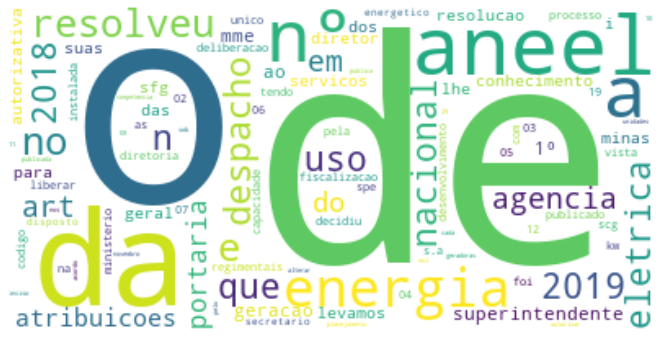

In [108]:
frequencies = {}
for bucket in buckets:
    frequencies[bucket['key']] = bucket['doc_count']

cloud = wordcloud.WordCloud(background_color="white")

cloud.generate_from_frequencies(frequencies)

fig, ax = plt.subplots(figsize=(16,6))
ax.imshow(cloud, interpolation='bilinear')
ax.imshow(cloud, interpolation='bilinear')
ax.axis('off')

### Wordcloud com Significant Terms

In [112]:
query = {
  "aggregations": {
    "termos": {
      "significant_terms": {
        "field": "texto",
        "size": 100,
        "mutual_information": {
          "include_negatives": True
         }
      }
    }
  },
  "query": {"term": {"flg_incluirsintese": "1"}}
}

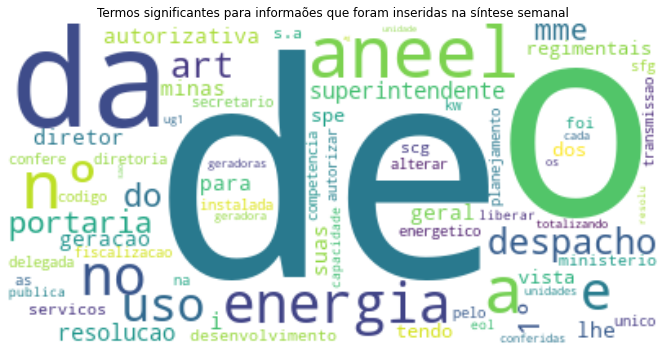

In [114]:
results = client.search(index=NOME_INDICE, body=query, size=0)
buckets = results['aggregations']['termos']['buckets']
frequencies = {}
for bucket in buckets:
    frequencies[bucket['key']] = bucket['doc_count']

cloud = wordcloud.WordCloud(background_color="white")

cloud.generate_from_frequencies(frequencies)

fig, ax = plt.subplots(figsize=(16,6))
ax.imshow(cloud, interpolation='bilinear')
ax.axis('off')
_ = ax.set_title('Termos significantes para informaões que foram inseridas na síntese semanal')